# CENSUS UNPACKED

![alt text][logo]

[logo]: https://mumbrella.com.au/wp-content/uploads/2016/02/census_logo.jpg

![alt text][logo2]

[logo2]: https://edge.alluremedia.com.au/uploads/businessinsider/2017/06/census-2016-graphic.jpg

## Why is this important?

The census is an **important collection of data** that informs many policy decisions made by the government. 

While all the information is publicly available, it is **not easy to understand**. Many outlets simplify the data into nice graphics for us but these agencies often have bias or agendas that don't make them impartial.

Through this assignment, I aim to **create a platform** that can help **'unpack'** previously unexplored **data!**


## OVERVIEW:

**The Process**

*STEP 1:* Download census data!

*STEP 2:* Extract desired data!

*STEP 3:* Unpack the Geopackage

*STEP 4:* Merge Census and Geopackage dataframes

*STEP 5:* Plot Plot Plot Away


**Results**

*Homelessness in Sydney:* The process example extrapolated

*Where do the old people live?:* Median age explored

*Overseas arrivals, where do they settle?:* An insight into our immigrant population



### STEP 1: Download census data!
    

#### How to Manaully Find the Data

Source: https://itt.abs.gov.au/itt/r.jsp?databyregion#/

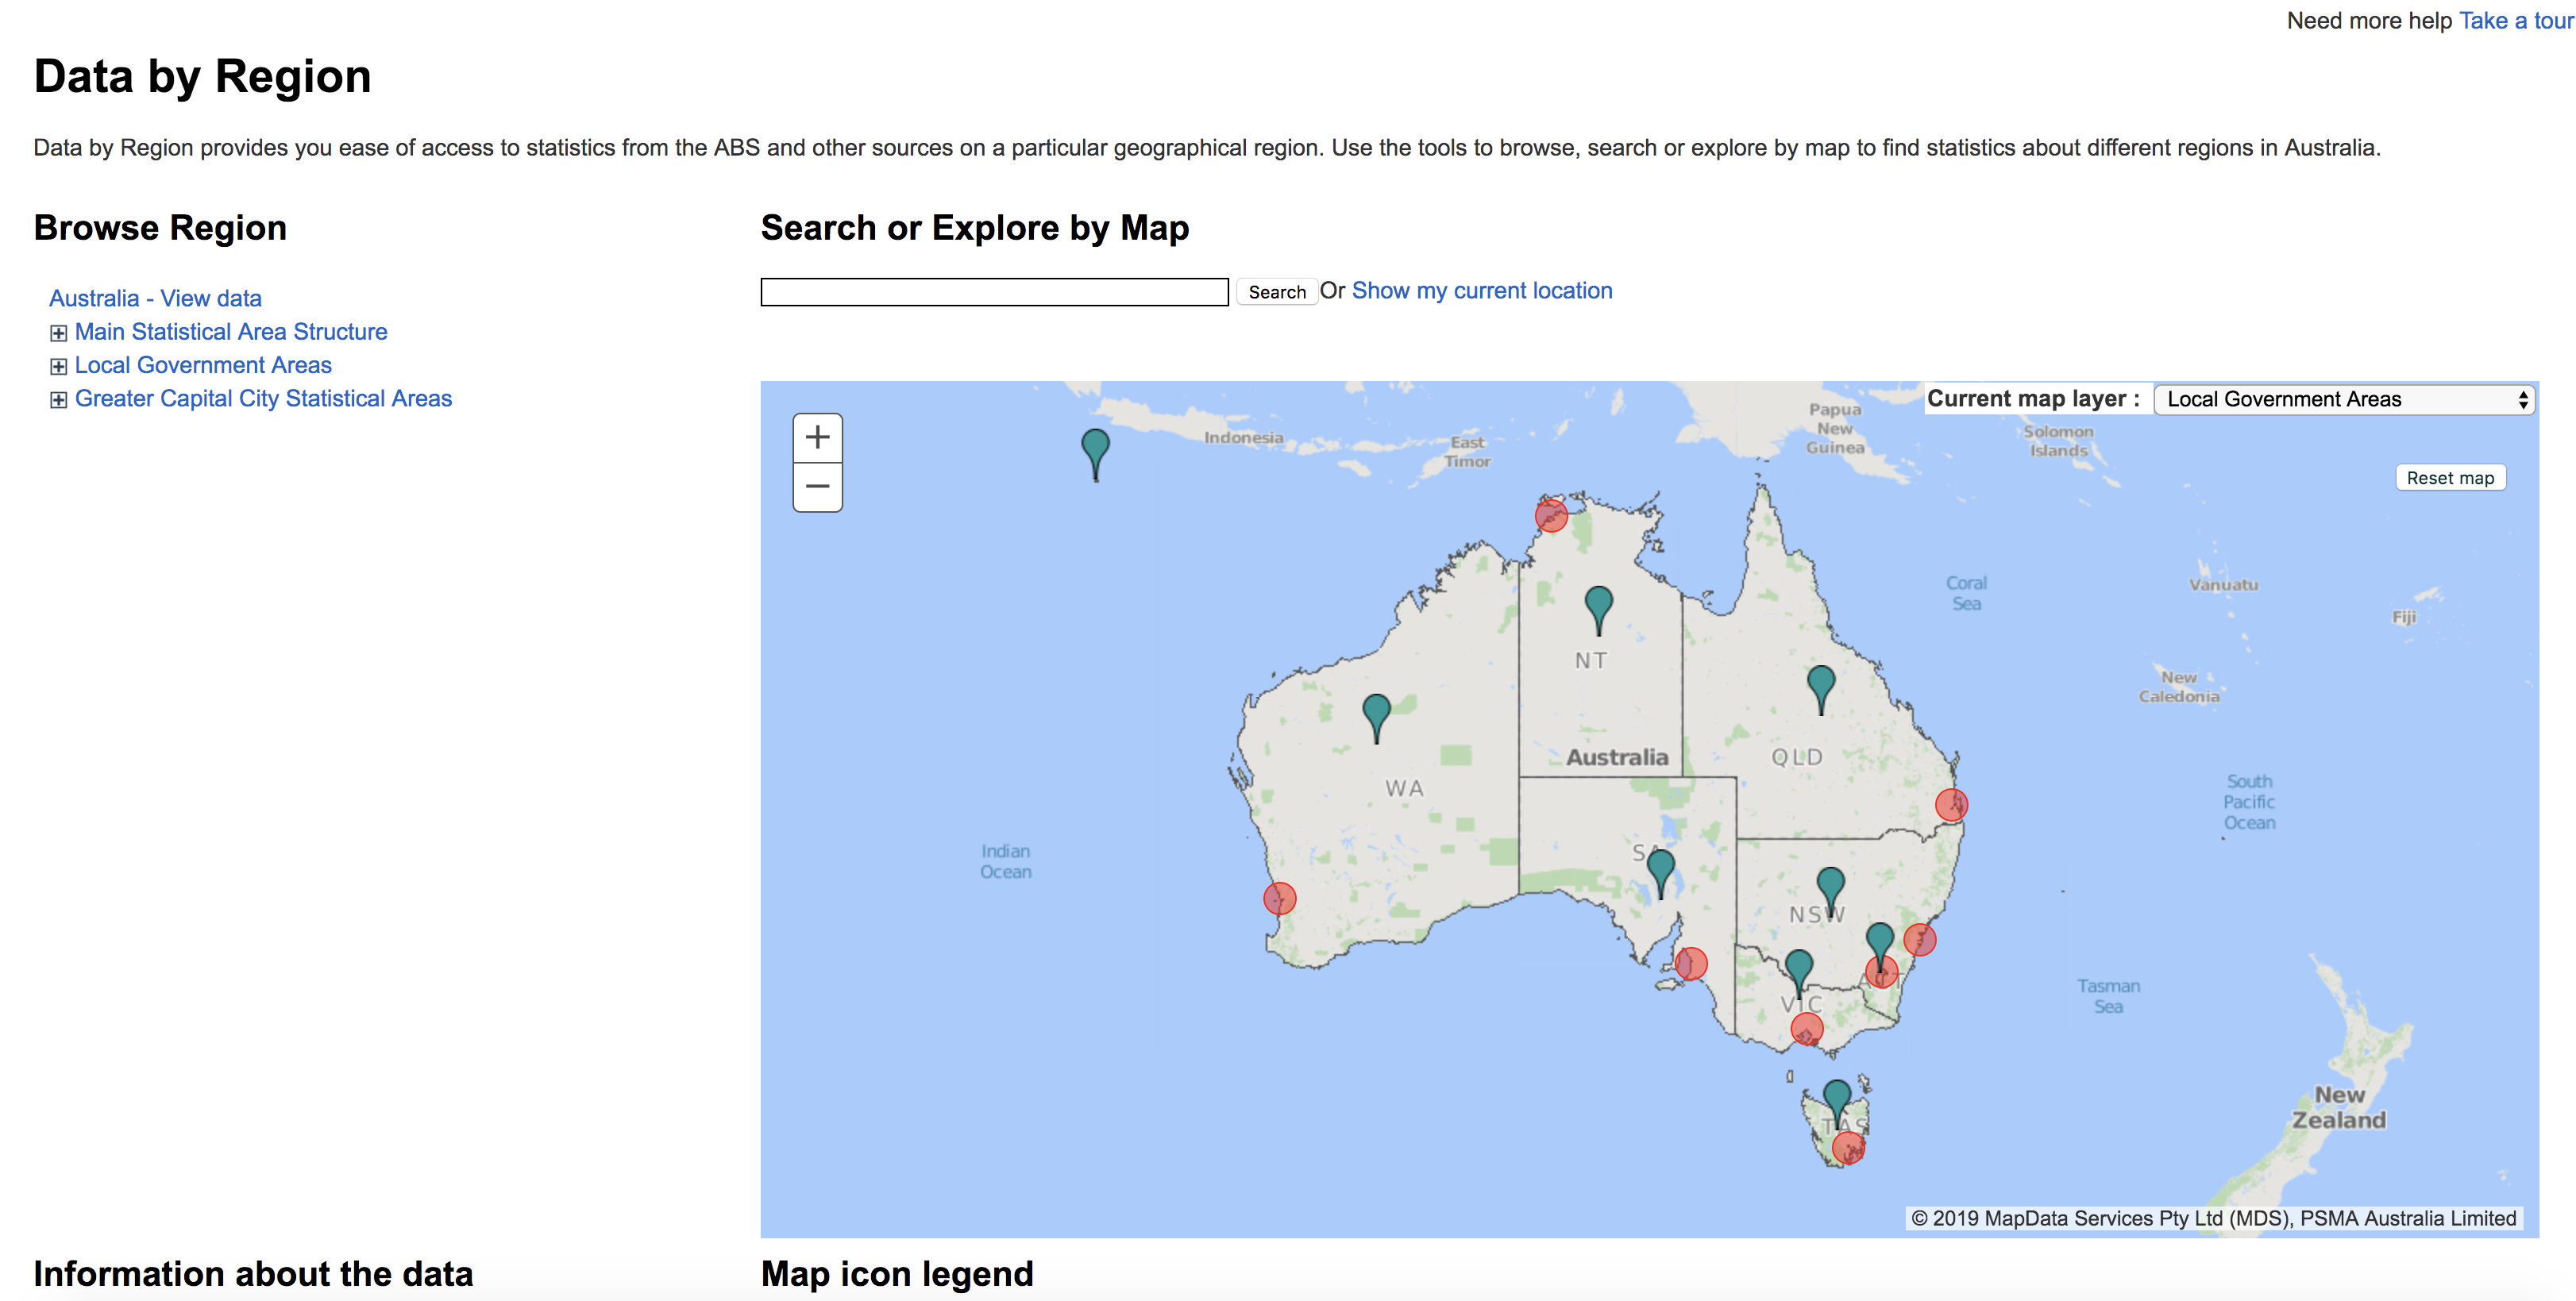



#### Path
Main Statistical Area Structure -> New South Wales -> Sydney - Eastern Suburbs -> Eastern Suburbs - South -> Kensington

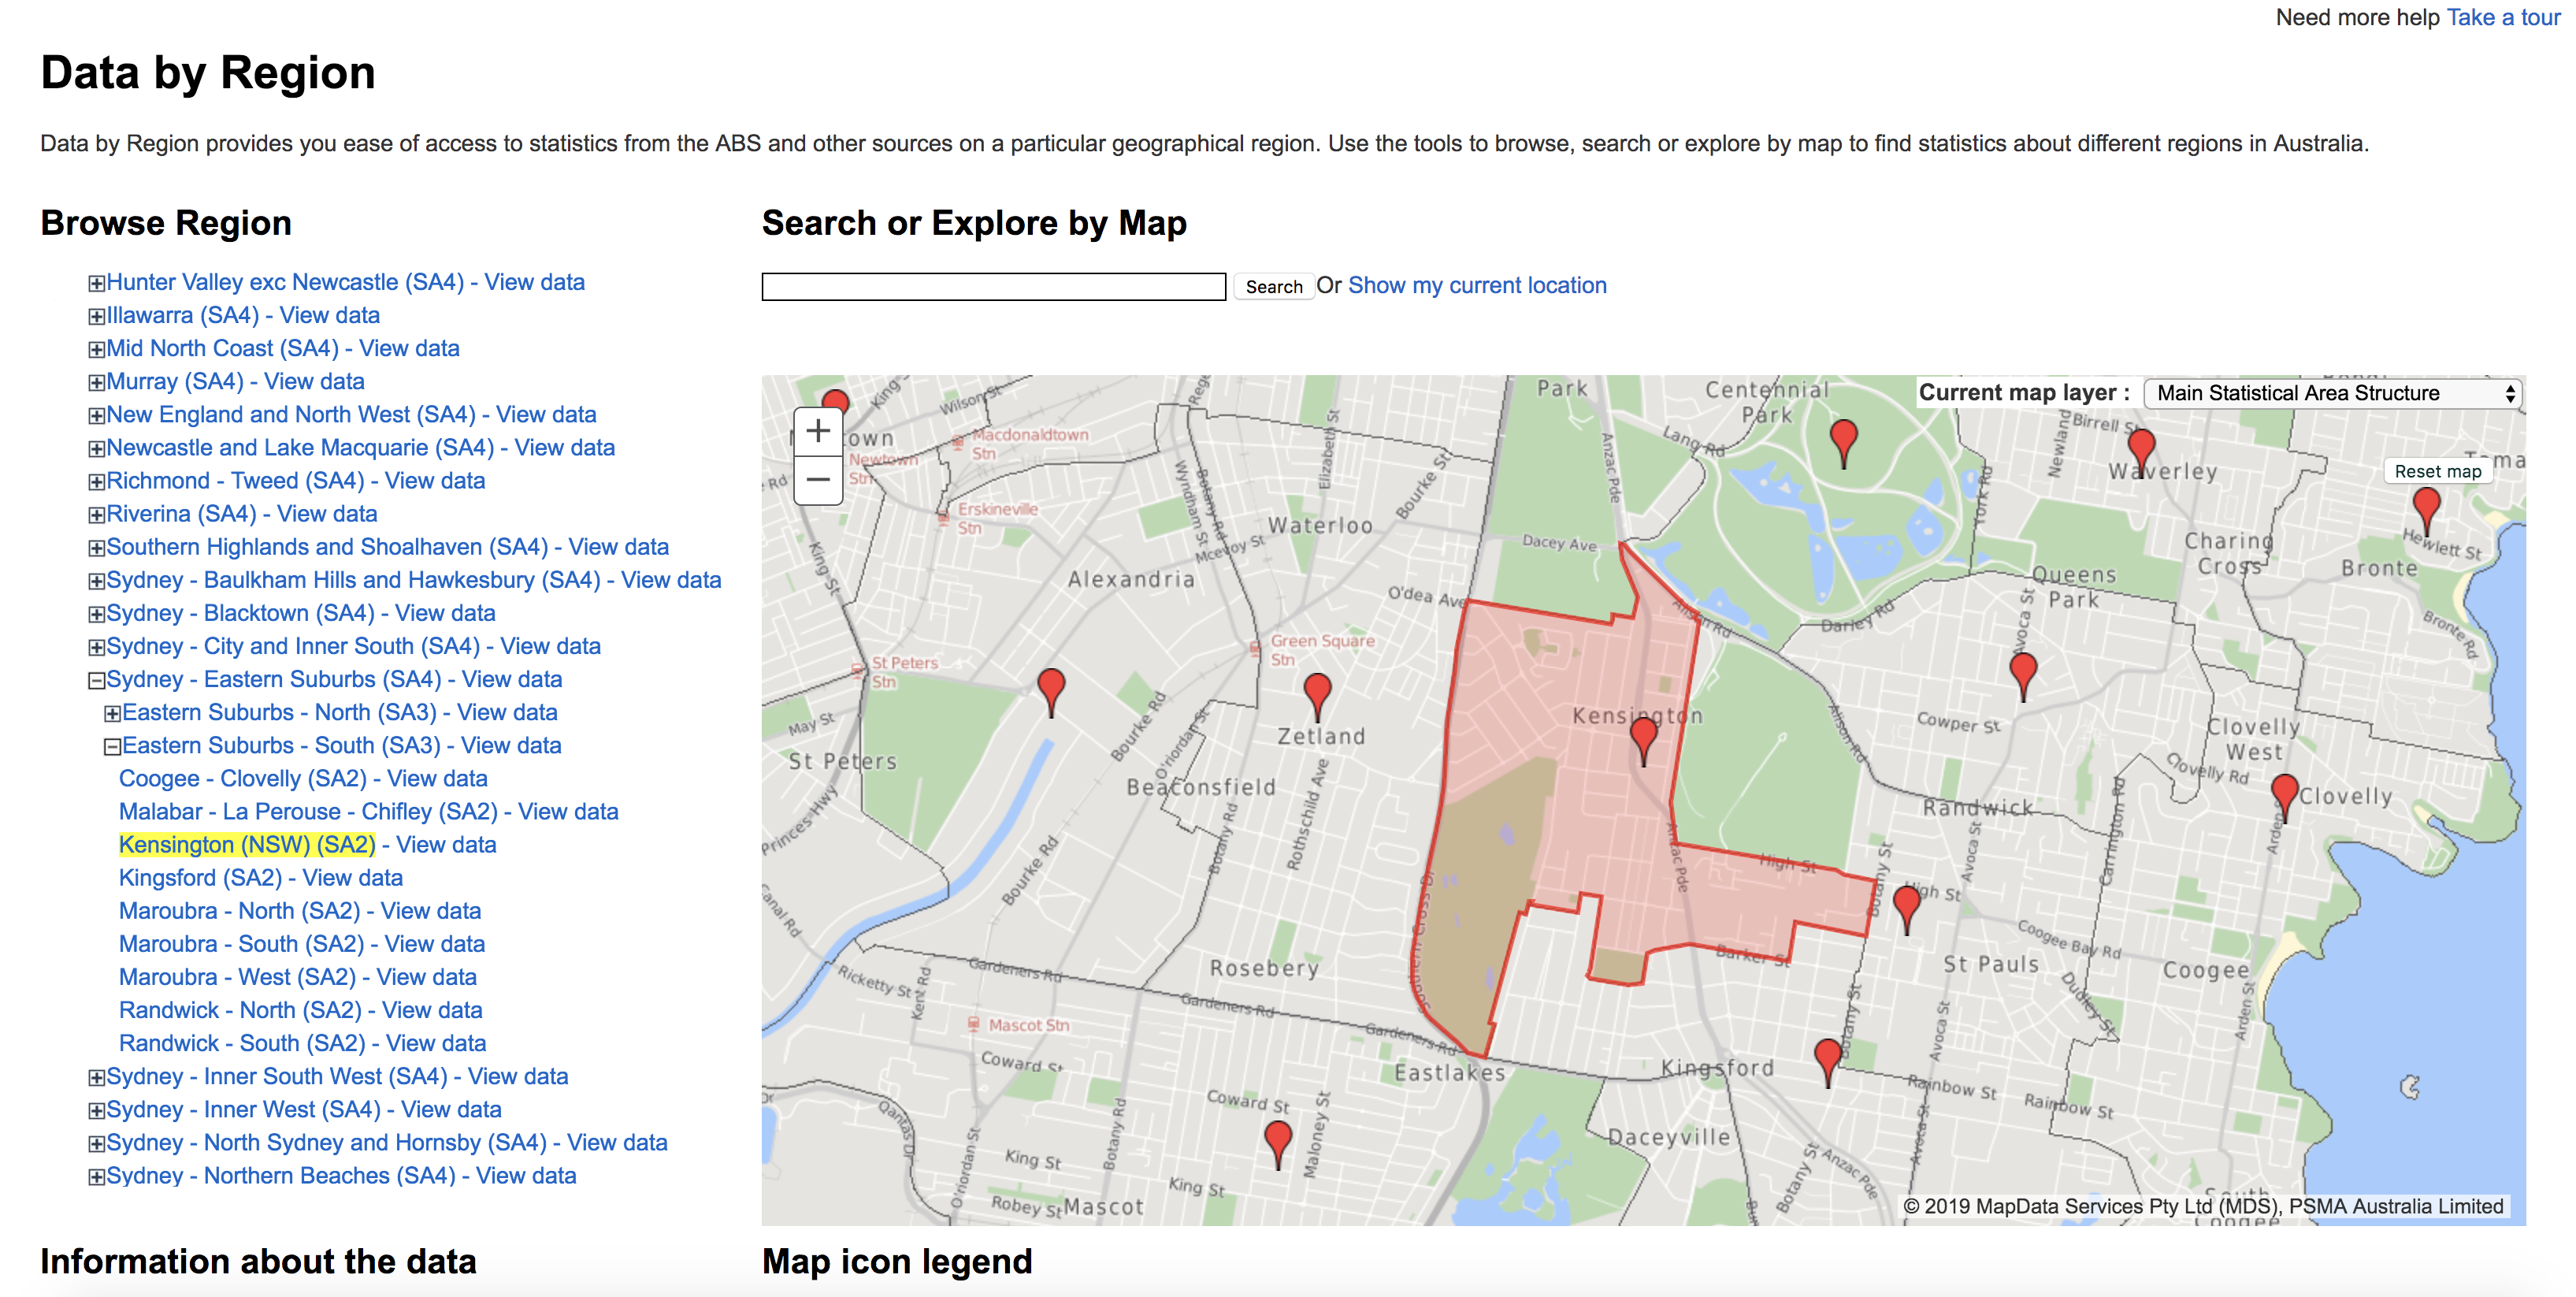

Click view data next to yellow link

#### Which opens....

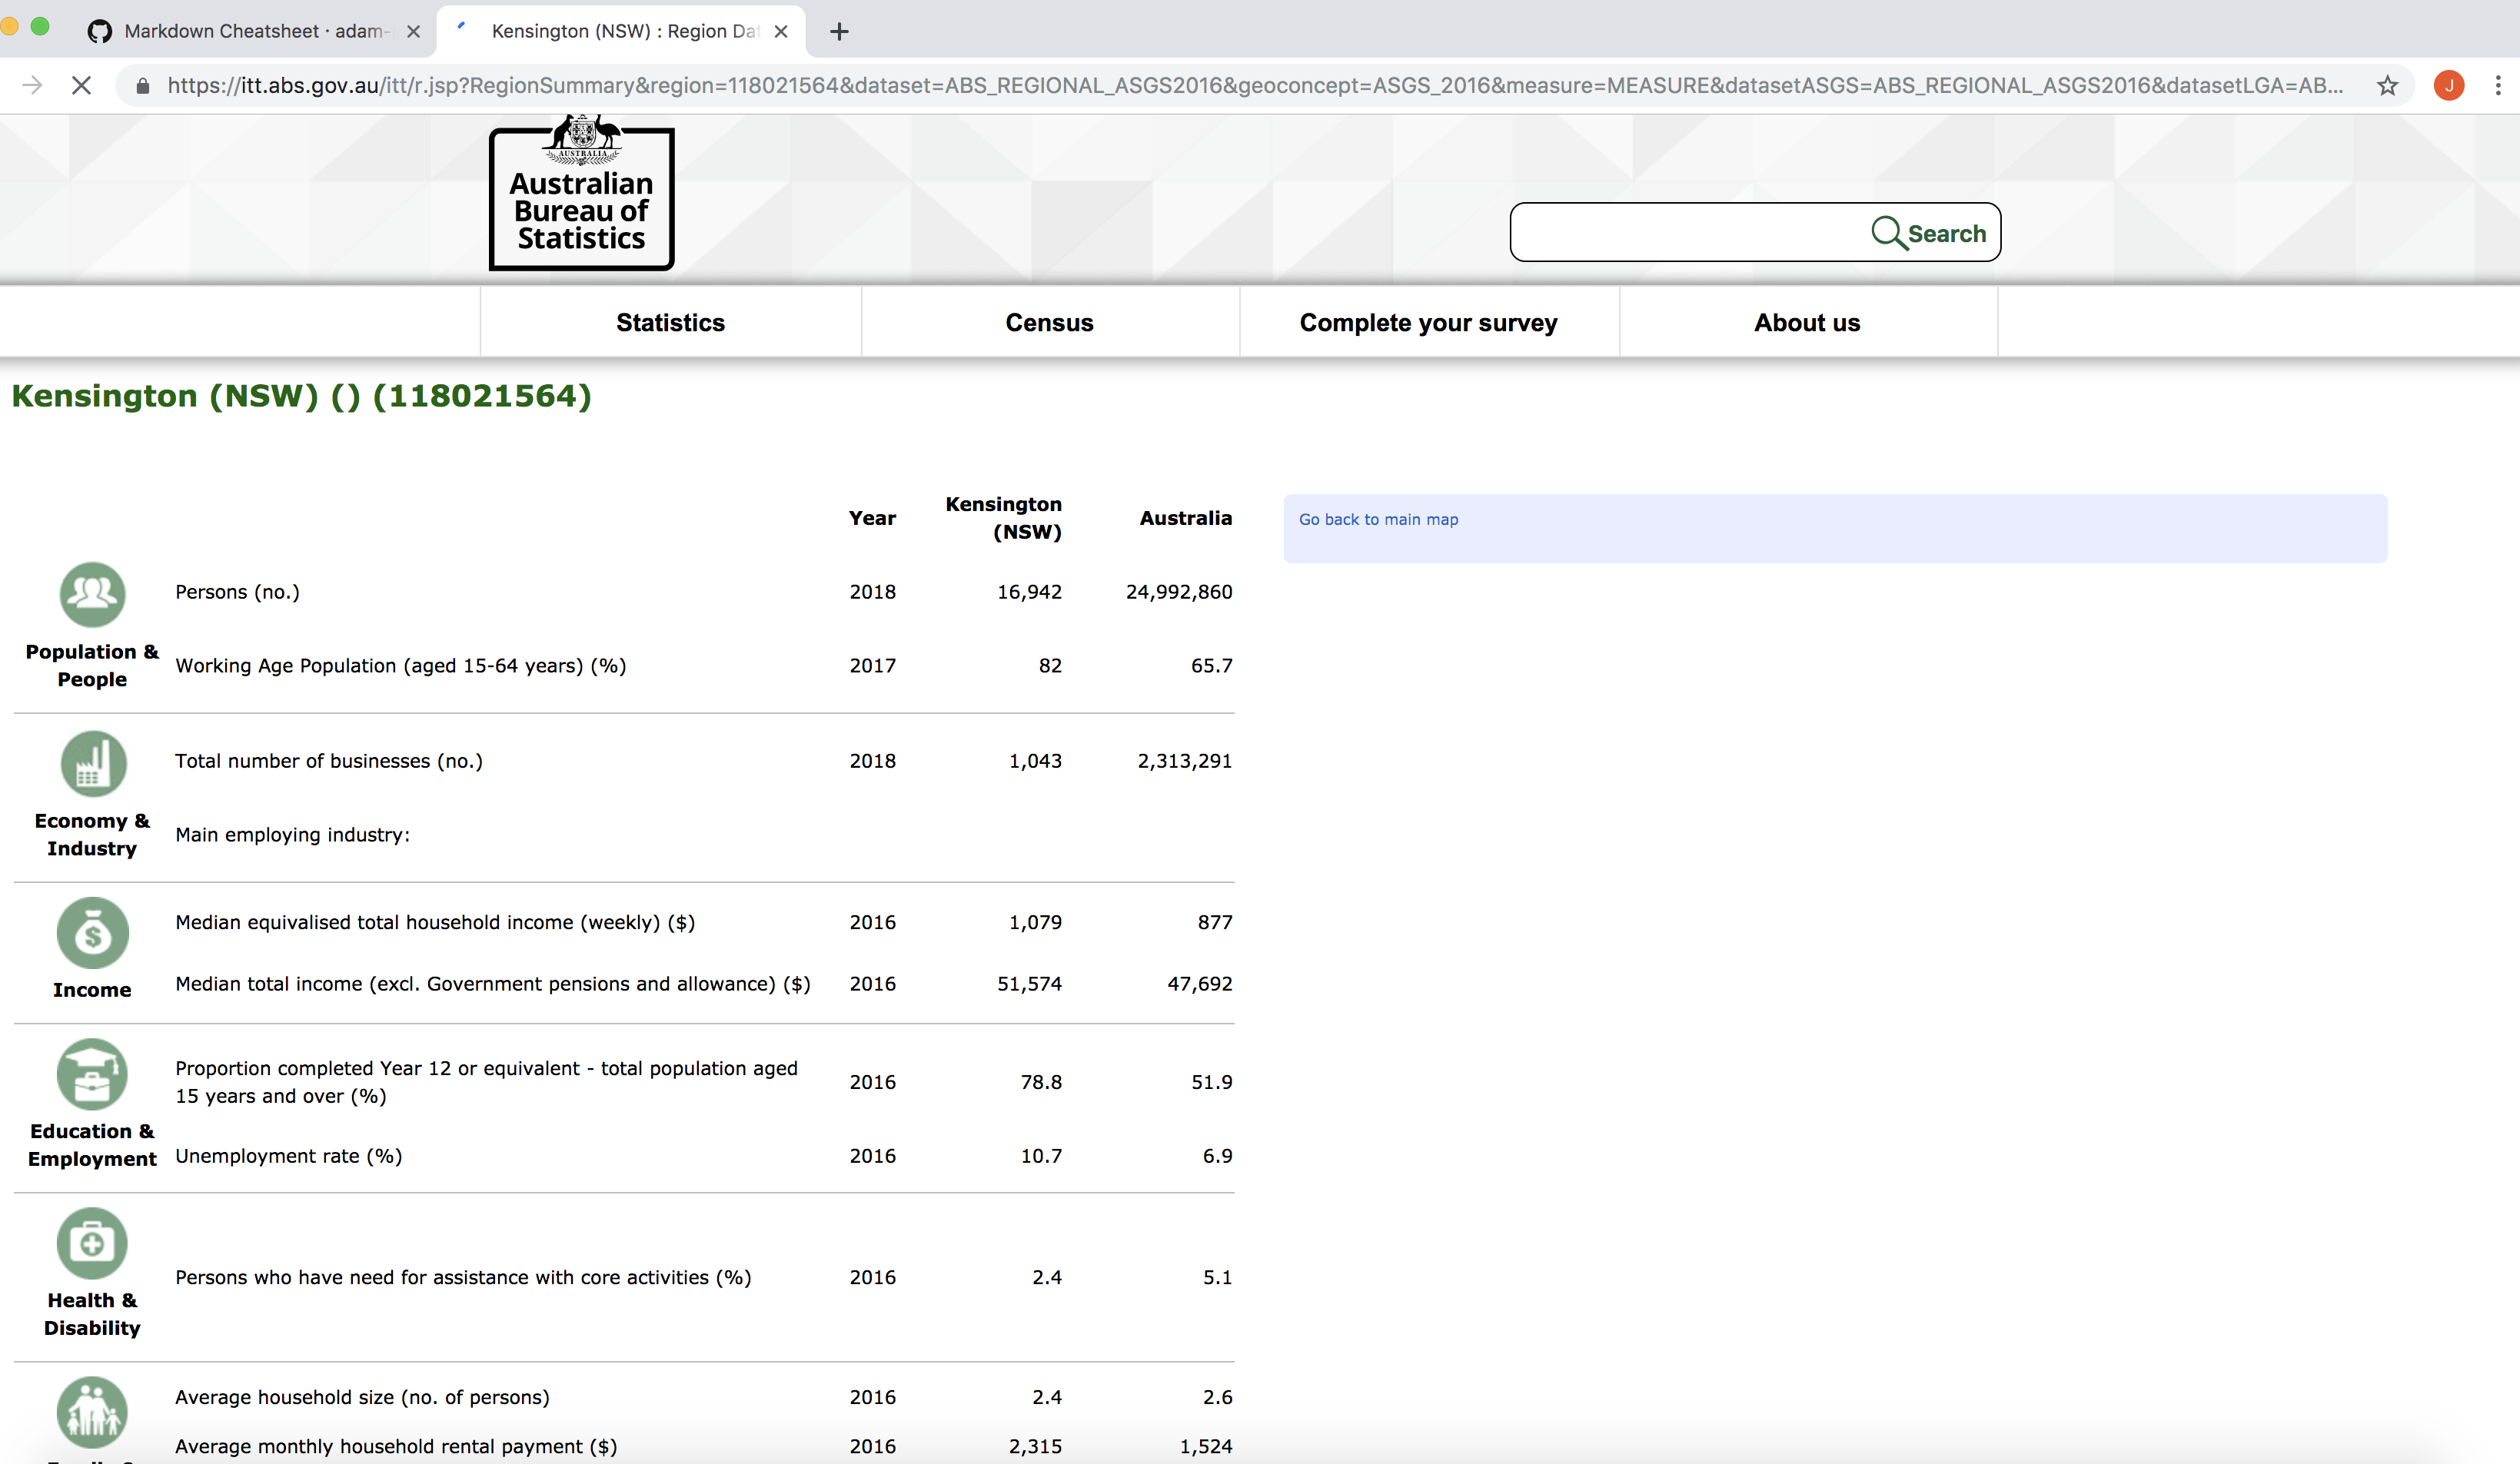

#### Scroll down and hey presto!

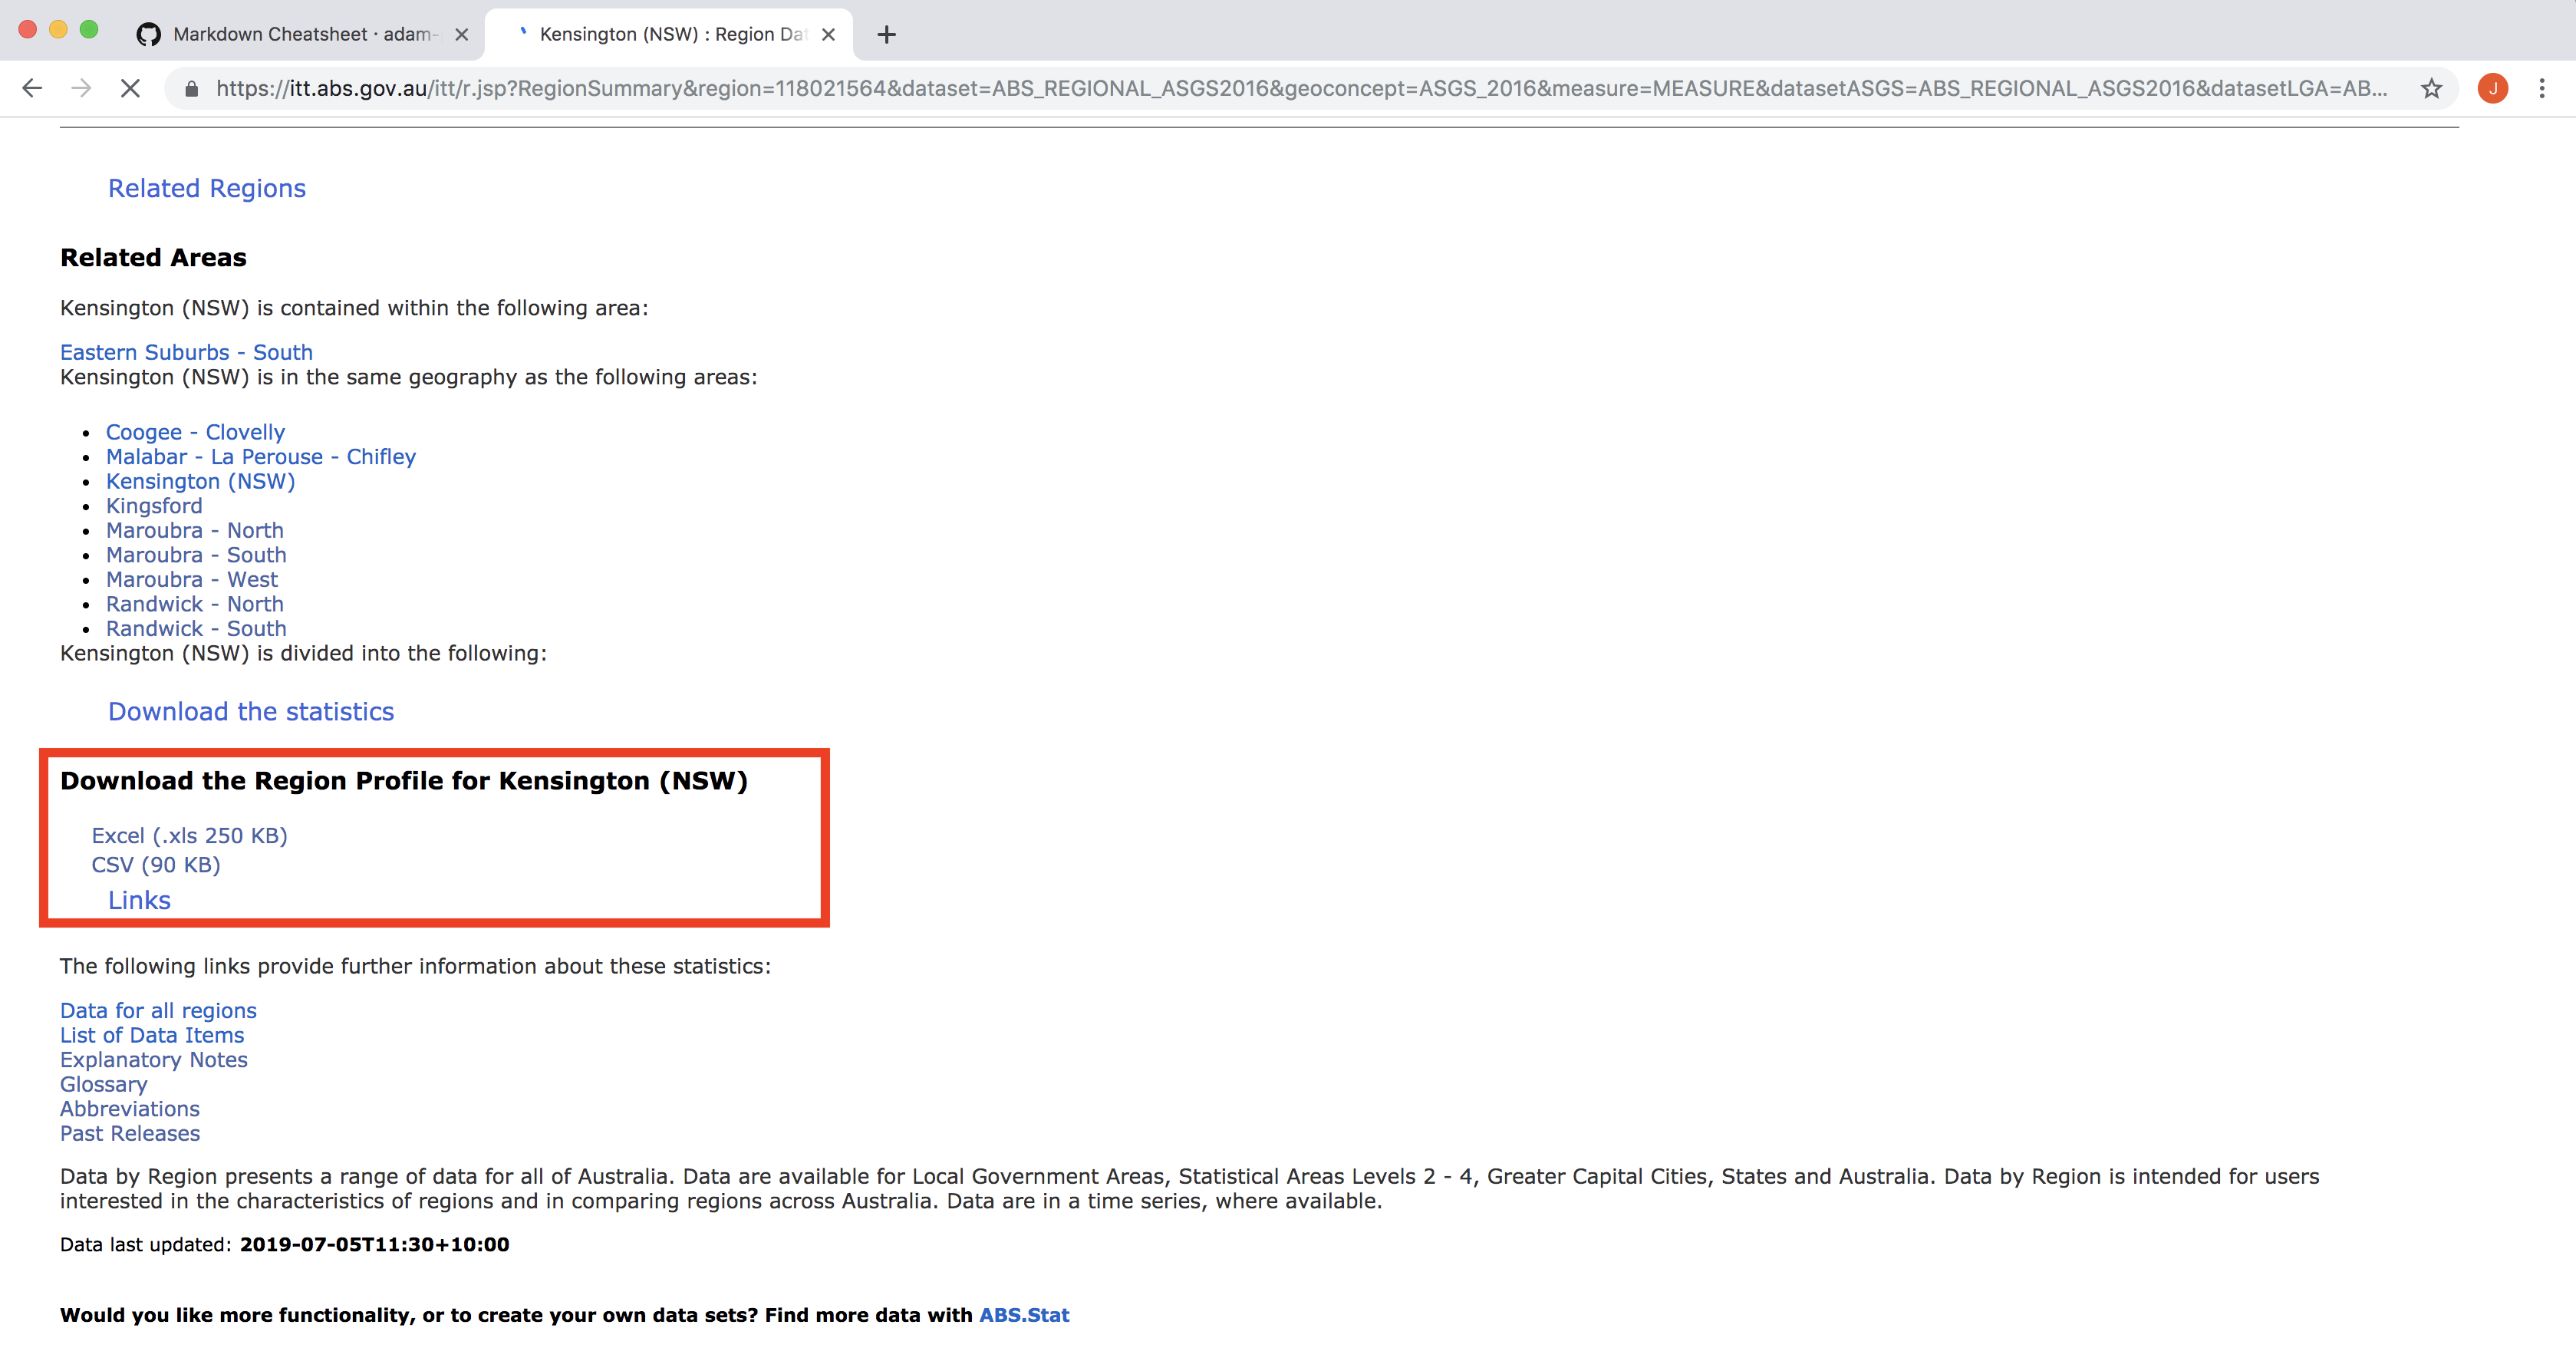

Why do this manually when you can code it???

### Loop for downloading Census CSV files

In [ ]:
import urllib.request

Area_Codes= [118021348, 118021348, 118021350, 118021564, 118021565,
 118021566, 118021567, 118021568, 118021569, 118021570]
 #From Census website, can be expanded

for i in Area_Codes:

    file_url = ("https://itt.abs.gov.au/itt/query.jsp?method=GetGenericData&datasetid=ABS_REGIONAL_ASGS2016"
                "&or=MEASURE&and=ASGS_2016.{number},"
                "FREQUENCY.A&TIME_FORMAT=P1Y&periods=2013,2014,2015,2016,2017,2018&"
                "format=csv&order=original").format(number=i)
    #change URL for each unique area codes
    #argument substitution occurs on 2nd line

    webpage_title(i)
    #See next slide for breakdown

    save_path='/Users/jbrighton/Documents/1161/me/week7/Data/{number}_{name}'.format(number=i, name=title)
    urllib.request.urlretrieve(file_url, save_path)
    #Saves with unique title

**Note:** This example only has 7 items which were intially where downloaded manually. However as code was designed to be scaled up, this was written afterwards and eventually used to download 281 SA2 areas that make up Greater Sydney. I'm glad I learnt code!

### Get title from webpage function

In [19]:
def webpage_title(i):

    from urllib import request
    title_url = ("https://itt.abs.gov.au/itt/r.jsp?RegionSummary&region=118021569&dataset=ABS_REGIONAL_ASGS2016&"
    "geoconcept=ASGS_2016&measure=MEASURE&datasetASGS=ABS_REGIONAL_ASGS2016&datasetLGA=ABS_REGIONAL_LGA2018&"
    "regionLGA=LGA_2018&regionASGS=ASGS_2016").format(number=i)
    #same idea as previous slide except with different URL

    html = request.urlopen(title_url).read().decode('utf8') #reads URL
    html[:60] 
    
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    java_title = soup.find('title')
    #Borrowed code. Uses BS package to isolate website page title
    
    content=java_title.string
    title=content.split(":")[0]
    print (title)
    #converts larger title into string so it can be split for area name

In [13]:
#Actual website title
print (content)

Randwick - North : Region Data Summary


In [20]:
webpage_title(118021348)

Randwick - North 



## STEP 2: Extract desired data!


### Listing files in a folder

In [1]:
import os
#required package

path = 'CSV files/'
files = []

for r, d, f in os.walk(path):
#Using os package, opens file from the local path variable
# r=root, d=directories, f = files

    for file in f:
#Loop for all the files in the folder
        
        if file == '.DS_Store':
                pass
#Exception for the DS_Store (short for Desktop Services Store), a file on Mac
#that stores custom attributes of its containing folder, 
#such as the position of icons or the choice of a background image. 
    
        else:
                files.append(os.path.join(r, file))
#Adds file path to an empty list

In [2]:
print (files)

['CSV files/118021348_Coogee - Clovelly ', 'CSV files/118021569_Randwick - North ', 'CSV files/118021564_Kensington (NSW) ', 'CSV files/118021565_Kingsford ', 'CSV files/118021570_Randwick - South ', 'CSV files/118021350_Malabar - La Perouse - Chifley ', 'CSV files/118021568_Maroubra - West ']


### Reading specified information off a file

In [3]:
import pandas as pd
#Package required for dataframes

temp_table= pd.DataFrame()
#creates empty dataframe

for f in files: 
    read_file = pd.read_csv(f)
    #Reads different file for each iteration

    search_criteria = read_file['Description']== "Homeless rate per 10,000 persons"
    new_info = read_file[search_criteria]
    #Searches the file and obtains rows with certain characteristic

In [4]:
print (new_info)

      Time  Value     MEASURE                       Description
1617  2011   19.0  HOMELESS_2  Homeless rate per 10,000 persons
1618  2016   17.8  HOMELESS_2  Homeless rate per 10,000 persons


### Wipe Index

In [5]:
new_info = new_info.reset_index(drop=True)
    #deletes index column. Makes it easier to compile

print (new_info)

   Time  Value     MEASURE                       Description
0  2011   19.0  HOMELESS_2  Homeless rate per 10,000 persons
1  2016   17.8  HOMELESS_2  Homeless rate per 10,000 persons


### Pulling out area number and name from the file name
Already nicely imbedded from download code :)

In [6]:
make_string = str(f)
#Converts to string so it can be split

split_filepath = make_string.split("/")
#Splits string by / character

name_and_code= split_filepath[1]
#Chooses 2nd part. Remember index starts from zero!

split_name_and_code= name_and_code.split("_")
#Another split of nominated 2nd part by _ character

area_code = split_name_and_code[0]
area_name = split_name_and_code[1]
#Assigns variable for further breakdown for area name and code

In [7]:
print ("Full file path: " + f)

Full file path: CSV files/118021568_Maroubra - West 


In [8]:
print ("area_code: " + area_code)
print ("area_name: " + area_name)

area_code: 118021568
area_name: Maroubra - West 


### Adding columns to dataframe 
for area number and name

In [9]:
###Adding columns with area number and name###

area_column = [area_name,area_name]
code_column = [area_code,area_code]
new_info['Code'] = code_column
new_info['Area'] = area_column
    #Adds new column with area name and code

In [10]:
pd.set_option('display.expand_frame_repr', False)
#Increases dataframe display width. Default breaks it up into two tables

print (new_info)

   Time  Value     MEASURE                       Description       Code              Area
0  2011   19.0  HOMELESS_2  Homeless rate per 10,000 persons  118021568  Maroubra - West 
1  2016   17.8  HOMELESS_2  Homeless rate per 10,000 persons  118021568  Maroubra - West 


### FINAL LOOP: extract info from all files
Combines elements from code above

In [11]:
temp_table= pd.DataFrame()

for f in files: 
    read_file = pd.read_csv(f)

    search_criteria = read_file['Description']== "Homeless rate per 10,000 persons"
    new_info = read_file[search_criteria]

    new_info = new_info.reset_index(drop=True)
    
    make_string = str(f)
    split_filepath = make_string.split("/")
    name_and_code= split_filepath[1]
    split_name_and_code= name_and_code.split("_")
    area_code = split_name_and_code[0]
    area_name = split_name_and_code[1]
 
    area_column = [area_name,area_name]
    code_column = [area_code,area_code]
    new_info['Code'] = code_column
    new_info['Area'] = area_column

    main_table = pd.concat([new_info, temp_table], axis=0)
    temp_table = main_table

#### Note: New part
At the bottom!

In [ ]:
    main_table = pd.concat([new_info, temp_table], axis=0)
    temp_table = main_table
    #Combines data from each iteration into one table

### Formatting: remove unneccessary column

In [12]:
###Formatting: removing unneccessary column/words###

main_table= main_table.drop ("MEASURE",axis=1)
#Deletes measure column
#Note: axis = 1 command changes the drop command from rows to columns

# Main Reveal

In [13]:
print(main_table)

   Time  Value                       Description       Code                             Area
0  2011   19.0  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
1  2016   17.8  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
0  2011   33.4  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
1  2016   29.7  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
0  2011   88.5  Homeless rate per 10,000 persons  118021570                Randwick - South 
1  2016  102.7  Homeless rate per 10,000 persons  118021570                Randwick - South 
0  2011   59.5  Homeless rate per 10,000 persons  118021565                       Kingsford 
1  2016  106.1  Homeless rate per 10,000 persons  118021565                       Kingsford 
0  2011   60.2  Homeless rate per 10,000 persons  118021564                Kensington (NSW) 
1  2016   61.1  Homeless rate per 10,000 persons  118021564           

### More Formatting: Table with 2016 Data only

In [14]:
###Formatting: Table with 2016 Data only###

main_table= main_table.drop(0)
#Drops all rows with index 0 (also 2011 rows)

print(main_table)

   Time  Value                       Description       Code                             Area
1  2016   17.8  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
1  2016   29.7  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
1  2016  102.7  Homeless rate per 10,000 persons  118021570                Randwick - South 
1  2016  106.1  Homeless rate per 10,000 persons  118021565                       Kingsford 
1  2016   61.1  Homeless rate per 10,000 persons  118021564                Kensington (NSW) 
1  2016   62.9  Homeless rate per 10,000 persons  118021569                Randwick - North 
1  2016   48.0  Homeless rate per 10,000 persons  118021348               Coogee - Clovelly 



## STEP 3: Unpack the Geopackage


### Good resources

Downloaded the 2016 New South Wales Geopackage on the census website. 
**Note:** This was in a different section to the other data scraped above
https://datapacks.censusdata.abs.gov.au/geopackages/

Extracted Statisical Area 2 Geojson with shape files inside from GPKG file with this program:
http://ngageoint.github.io/geopackage-js/

If you want to explore the boundaries and layering of the GeoJson file, open with this:
http://geojson.io/#map=6/-32.954/150.054
**Note:** It is a little slow

This link will reformat the file to make it readable by a human in python however this is not necessary
https://beautifier.io/


## Boundary line comparison
Suburbs vs census areas

<img src="Screen Shot 2019-08-09 at 1.20.15 pm.png" width= "450"> 
<img src="Screen Shot 2019-08-09 at 1.20.50 pm.png" width= "600">

### Open GeoJson

In [15]:
import geopandas as gpd 
import matplotlib.pyplot as plt

df = gpd.read_file('../formatted_SA2.geojson')
#Use geopandas to read the file
#df - dataframe

In [16]:
df.head()
#only displays top rows

primaryindex sa2_maincode_2016  Count_home_Census_Nt_0_14_yr  Count_hom_Census_Nt_15_24_yr  Count_hom_Census_Nt_25_34_yr  Count_hom_Census_Nt_35_44_yr  Count_hom_Census_Nt_45_54_yr  Count_hom_Census_Nt_55_64_yr  Count_hom_Census_Nt_65_74_yr  Count_hom_Census_Nt_75_84_yr  ...  Difnt_Usl_add_5_yr_ago_Tot_M  Difnt_Usl_add_5_yr_ago_Tot_F  Difnt_Usl_add_5_yr_ago_Tot_P  N_stated_M_G42  N_stated_F_G42  N_stated_P_G42  Tot_M_G42  Tot_F_G42  Tot_P_G42                                           geometry
0             1         124031461                          3488                          1915                          2446                          2371                          1897                          2026                          1666                           659  ...                          2547                          2712                          5260             451             474             924       7750       8284      16036  POLYGON ((150.668015306 -33.75867972099996, 15...
1             2         110021194                           996                           493                           382                           623                           773                          1206                          1055                           484  ...                           871                           973                          1848             385             392             773       3113       3235       6343  POLYGON ((151.957926 -28.51592999699994, 151.9...
2             3         124041468                          1273                          1105                          1041                          1068                          1053                           816                           546                           186  ...                           789                           762                          1553             991             464            1452       3869       3166       7037  POLYGON ((150.695831007 -33.60961500899998, 15...
3             4         111021217                          3240                          1616                          2016                          2063                          1590                          1298                           977                           494  ...                          2643                          2937                          5576             299             316             616       6259       6706      12959  POLYGON ((151.6008459520001 -32.88926030699997...
4             5         103021062                          1375                           617                           732                           658                           735                           823                           667                           448  ...                           799                           879                          1678             420             372             791       3071       3049       6119  POLYGON ((146.0950879860001 -33.27617800199994...

[5 rows x 311 columns]

**Note:** Actual size = (578, 311). Found with *df.shape*

This is a massive file with a lot of extra data imbedded. I have only displayed the top with df.head

The actual size = (578, 311). This can be found with df.shape

Note: One could skip to this section and still have a lot of data to compare different regions with. However many of the categories are also not on here such as homelessness and since I did the work I thought I might as well incorporate it!


### Formatting: keep only area-codes and shape files columns

In [17]:
df = df[['sa2_maincode_2016','geometry']]

df.head()

sa2_maincode_2016                                           geometry
0         124031461  POLYGON ((150.668015306 -33.75867972099996, 15...
1         110021194  POLYGON ((151.957926 -28.51592999699994, 151.9...
2         124041468  POLYGON ((150.695831007 -33.60961500899998, 15...
3         111021217  POLYGON ((151.6008459520001 -32.88926030699997...
4         103021062  POLYGON ((146.0950879860001 -33.27617800199994...

### Formatting: delete 2 rows without shape files
Happen to be last two rows

In [18]:
df = df.drop([576,577], axis=0)
#576, 577 refer to row number



## STEP 4: Merge Census and Geopackage dataframes


### List unique values in a column

In [19]:
code_list = main_table.Code.unique()
#List unique area codes from first table. Important since not all the areas were used in this run

In [20]:
print (code_list)

['118021568' '118021350' '118021570' '118021565' '118021564' '118021569'
 '118021348']


### Keep rows from geopackage that match area codes

In [21]:
newdf = df[df['sa2_maincode_2016'].isin(code_list)]
#Makes new dataframe with codes from sa2_maincode_2016 that match code_list made in step above

newdf2 = newdf[['sa2_maincode_2016', 'geometry']]
#Formatting: when you make new dataframe old rows appear especially if you didn't define old dataframe without them
#Unneccesary with a refactor

In [22]:
newdf2 

sa2_maincode_2016                                           geometry
8           118021348  (POLYGON ((151.249332994 -33.91452159399995, 1...
24          118021564  POLYGON ((151.2225498050001 -33.90130016199998...
101         118021570  POLYGON ((151.249332994 -33.91452159399995, 15...
109         118021569  POLYGON ((151.249332994 -33.91452159399995, 15...
129         118021568  POLYGON ((151.2395608490001 -33.94167069499997...
303         118021350  POLYGON ((151.2219293050001 -33.95919365399993...
536         118021565  POLYGON ((151.2359737380001 -33.91904537999994...

### Sort area codes by ascending order

In [23]:
newdf2.sort_values(by=['sa2_maincode_2016'], inplace=True)
#Sorts streamlines geopackage dataframe by the values in sa2_maincode_2016. Descending order by default

main_table.sort_values(by=['Code'], inplace=True)
#Does the same for census dataframe by Code column

#This ensures that they match up when we merge them!

In [24]:
#For example,
newdf2

sa2_maincode_2016                                           geometry
8           118021348  (POLYGON ((151.249332994 -33.91452159399995, 1...
303         118021350  POLYGON ((151.2219293050001 -33.95919365399993...
24          118021564  POLYGON ((151.2225498050001 -33.90130016199998...
536         118021565  POLYGON ((151.2359737380001 -33.91904537999994...
129         118021568  POLYGON ((151.2395608490001 -33.94167069499997...
109         118021569  POLYGON ((151.249332994 -33.91452159399995, 15...
101         118021570  POLYGON ((151.249332994 -33.91452159399995, 15...

### Merge!

In [25]:
newdf2 = newdf2.reset_index(drop=True)
main_table = main_table.reset_index(drop=True)
#Reset index values, not completely necessary but it doesn't like it when they are different

final_table = pd.concat([newdf2, main_table], axis=1)
#Join line! Note: axis=1 puts them next not each other rather than below like axis=0 which is default

In [26]:
final_table
#Check area codes they match up, they should!

sa2_maincode_2016                                           geometry  Time  Value                       Description       Code                             Area
0         118021348  (POLYGON ((151.249332994 -33.91452159399995, 1...  2016   48.0  Homeless rate per 10,000 persons  118021348               Coogee - Clovelly 
1         118021350  POLYGON ((151.2219293050001 -33.95919365399993...  2016   29.7  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
2         118021564  POLYGON ((151.2225498050001 -33.90130016199998...  2016   61.1  Homeless rate per 10,000 persons  118021564                Kensington (NSW) 
3         118021565  POLYGON ((151.2359737380001 -33.91904537999994...  2016  106.1  Homeless rate per 10,000 persons  118021565                       Kingsford 
4         118021568  POLYGON ((151.2395608490001 -33.94167069499997...  2016   17.8  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
5         118021569  POLYGON ((151.249332994 -33.91452159399995, 15...  2016   62.9  Homeless rate per 10,000 persons  118021569                Randwick - North 
6         118021570  POLYGON ((151.249332994 -33.91452159399995, 15...  2016  102.7  Homeless rate per 10,000 persons  118021570                Randwick - South


## STEP 5: Plot Plot Plot Away


In [31]:
###Increases plot size###

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

### Histogram

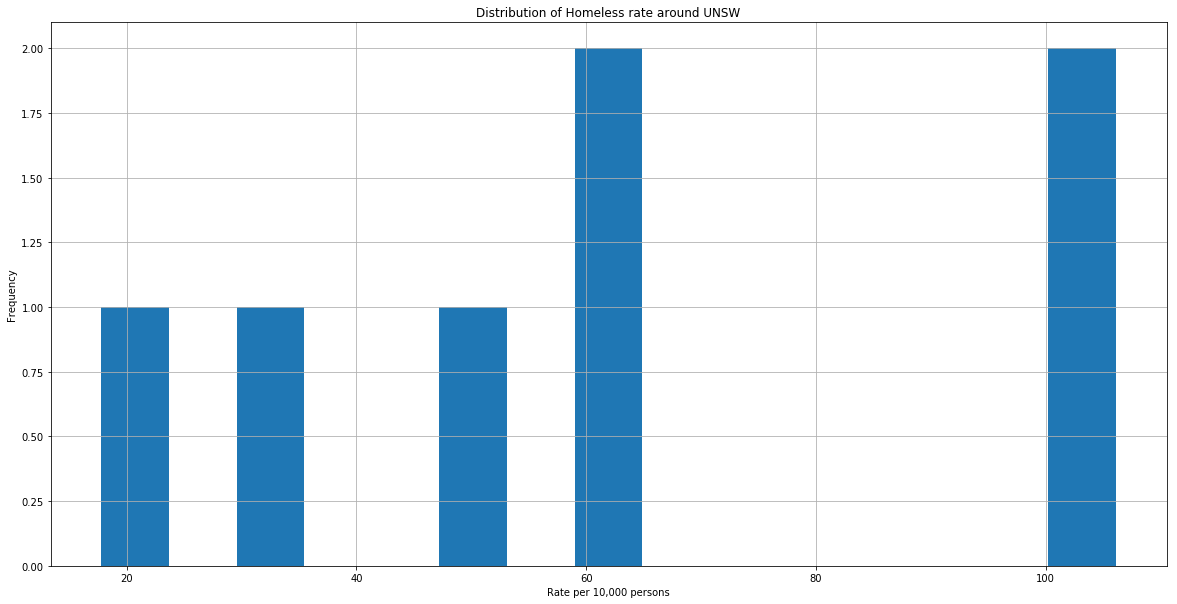

In [32]:
final_table.Value.hist(bins=15)

plt.xlabel("Rate per 10,000 persons")
plt.ylabel("Frequency")
plt.title("Distribution of Homeless rate around UNSW");

In [28]:
###Centorid function for labels###

def add_centroid(row):
    return row.geometry.centroid

final_table["centroid"] = final_table.apply(add_centroid, axis=1)

Text(0.5, 1.0, 'Map of the Rate of Homeless around UNSW')

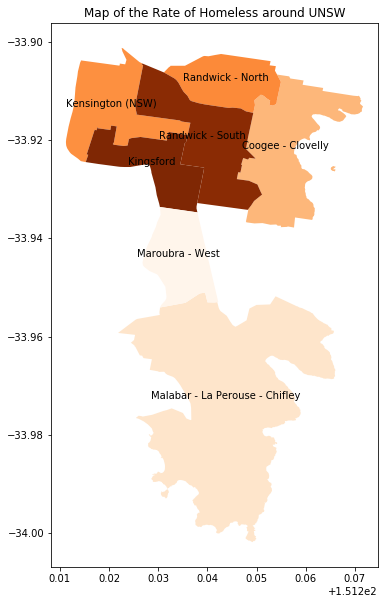

In [30]:
final_table.plot(column='Value', cmap='Oranges');

for idx, row in final_table.iterrows():
    plt.annotate(s=row.Area, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')
    
plt.title("Map of the Rate of Homeless around UNSW")



# MORE RESULTS:
with other fun data!!!!



## Homelessness in Sydney
The process example extrapolated

### Histogram, whole of Greater Sydney

 <img src="21.png" alt="drawing" width="1100"/>
 
**Observations:** In Sydney, rates of homeless are generally quite low bar a few pockets where rate is 5x the average

### Can you guess what suburbs have highest rates of Homelessness in Sydney??

Have a think quickly as the answer will be revealed

### Bigger and Better Map Around UNSW

 <img src="22.png" alt="drawing" width="800"/>

**Observations:** Significantly different from the process example. Introduction of Surrey Hills with much high rate of homelessness skews the data so Kingsford and Randwick South are no longer red.

### Bigger Map Again

 <img src="23.png" alt="drawing" width="800"/>
 
 **Observations:** As expected, suburbs in the Central Business District of Sydney (CBD) have highest rates of homelessness. Homeless population is very visible in CBD and beggars are quite common. 

### Most of Sydney
*This is where it gets interesting!*

 <img src="24.png" alt="drawing" width="600"/>
 
 **What suburb is red on the left side of the diagram?**

*Answer:* **Auburn** 

Unexpectly, Auburn North and South have rates of homeless that rival the city! Homelessness is also much more common on the south side of the harbour

 ## Greater Sydney
Inclusive of Gosford and Blue Mountains. Some areas missing data therefore are blank.
 
 <img src="25.png" alt="drawing" width="600"/>
 
**Observation:** The greater area around Gosford also has higher than average rates of homelessness. However without a more detailed breakdown, hard to know if this is concentrated in the town itself or just the general area. 

### Top 10 Worst Areas

 *Initial method*
 
 <img src="26.png" alt="drawing" width="1200"/>

 *Revised method-* **Bar Graph**
 
 <img src="27.png" alt="drawing" width="1200"/>

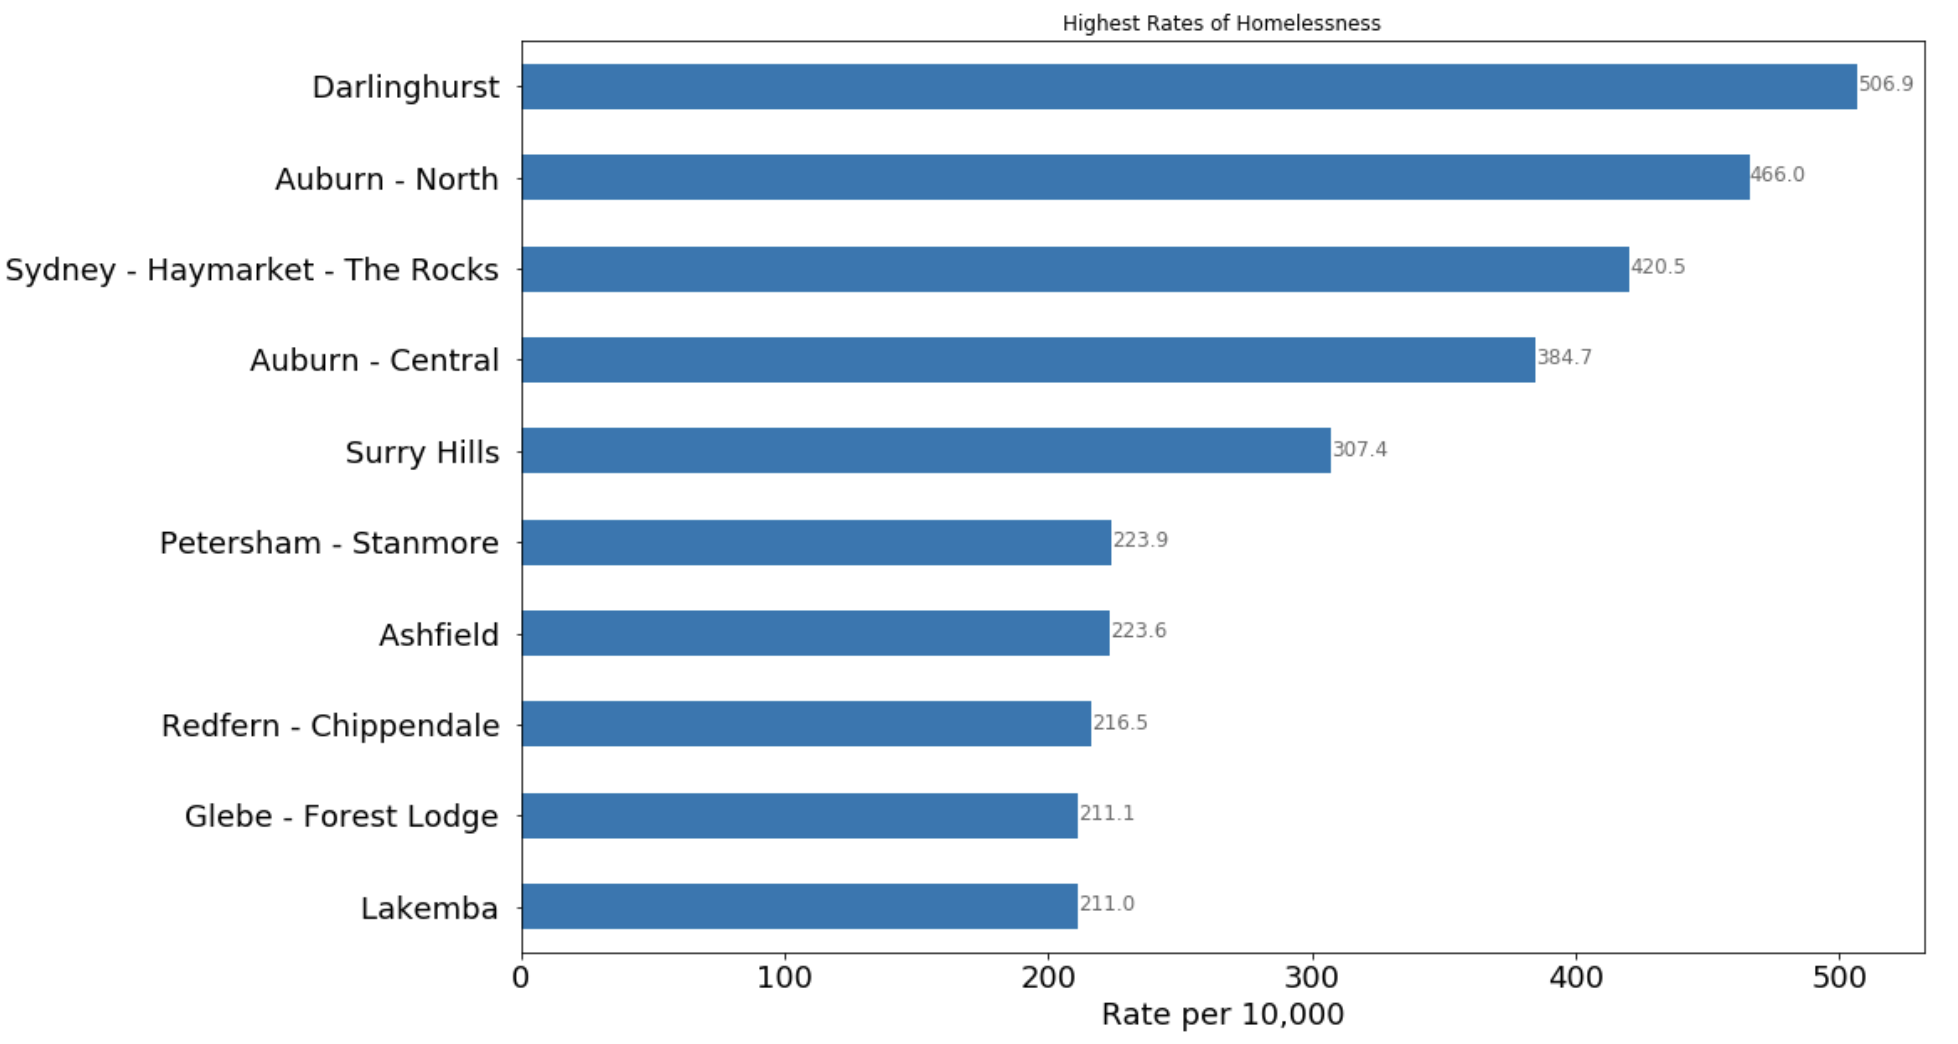

**Observation:**
Top 5 worst areas are significiantly higher than the rest. After that, the next 5 are very similar in value. Are they estimations for the general area rather than actual counts?

### Top 10 Best Areas

 <img src="28.png" alt="drawing" width="1300"/>

**Note:** The different scale, intervals of 10 rather than 100. These area would barely be visible on the previous chart

### How are rates of homeless calculated?
Is it a very reliable statistic? If you don't have a home address how would you be sent the census to complete?

From my research, I came across this document from Auburn in United States which details methods of counting homeless in different places accross the world including Sydney (https://s3-us-west-2.amazonaws.com/uw-s3-cdn/wp-content/uploads/sites/136/2018/07/24194413/SOC_415_Counting_Homeless_Web.pdf)  

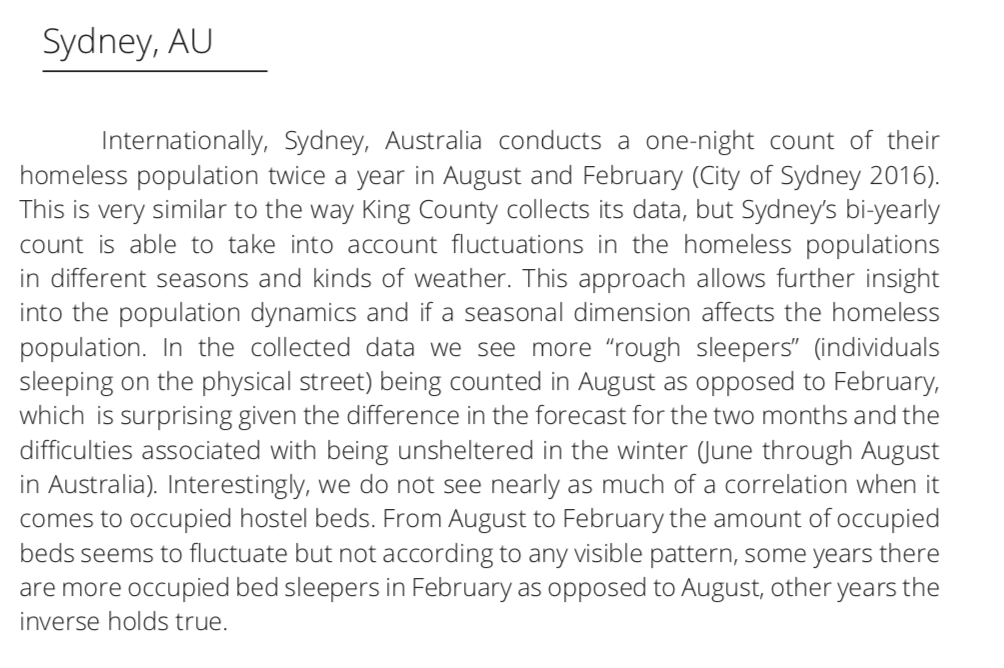

#### Does this system still have problems?
Short answer, Yes. However large-scale statistics are never going to be perfect. This method doesn't account for those who are hidden (eg. sleeping in cars, on friend's couch etc.)

## Where do the old people live?
Exploration of median age. 
Featuring some neat bar graphs!

### Histogram 2.0

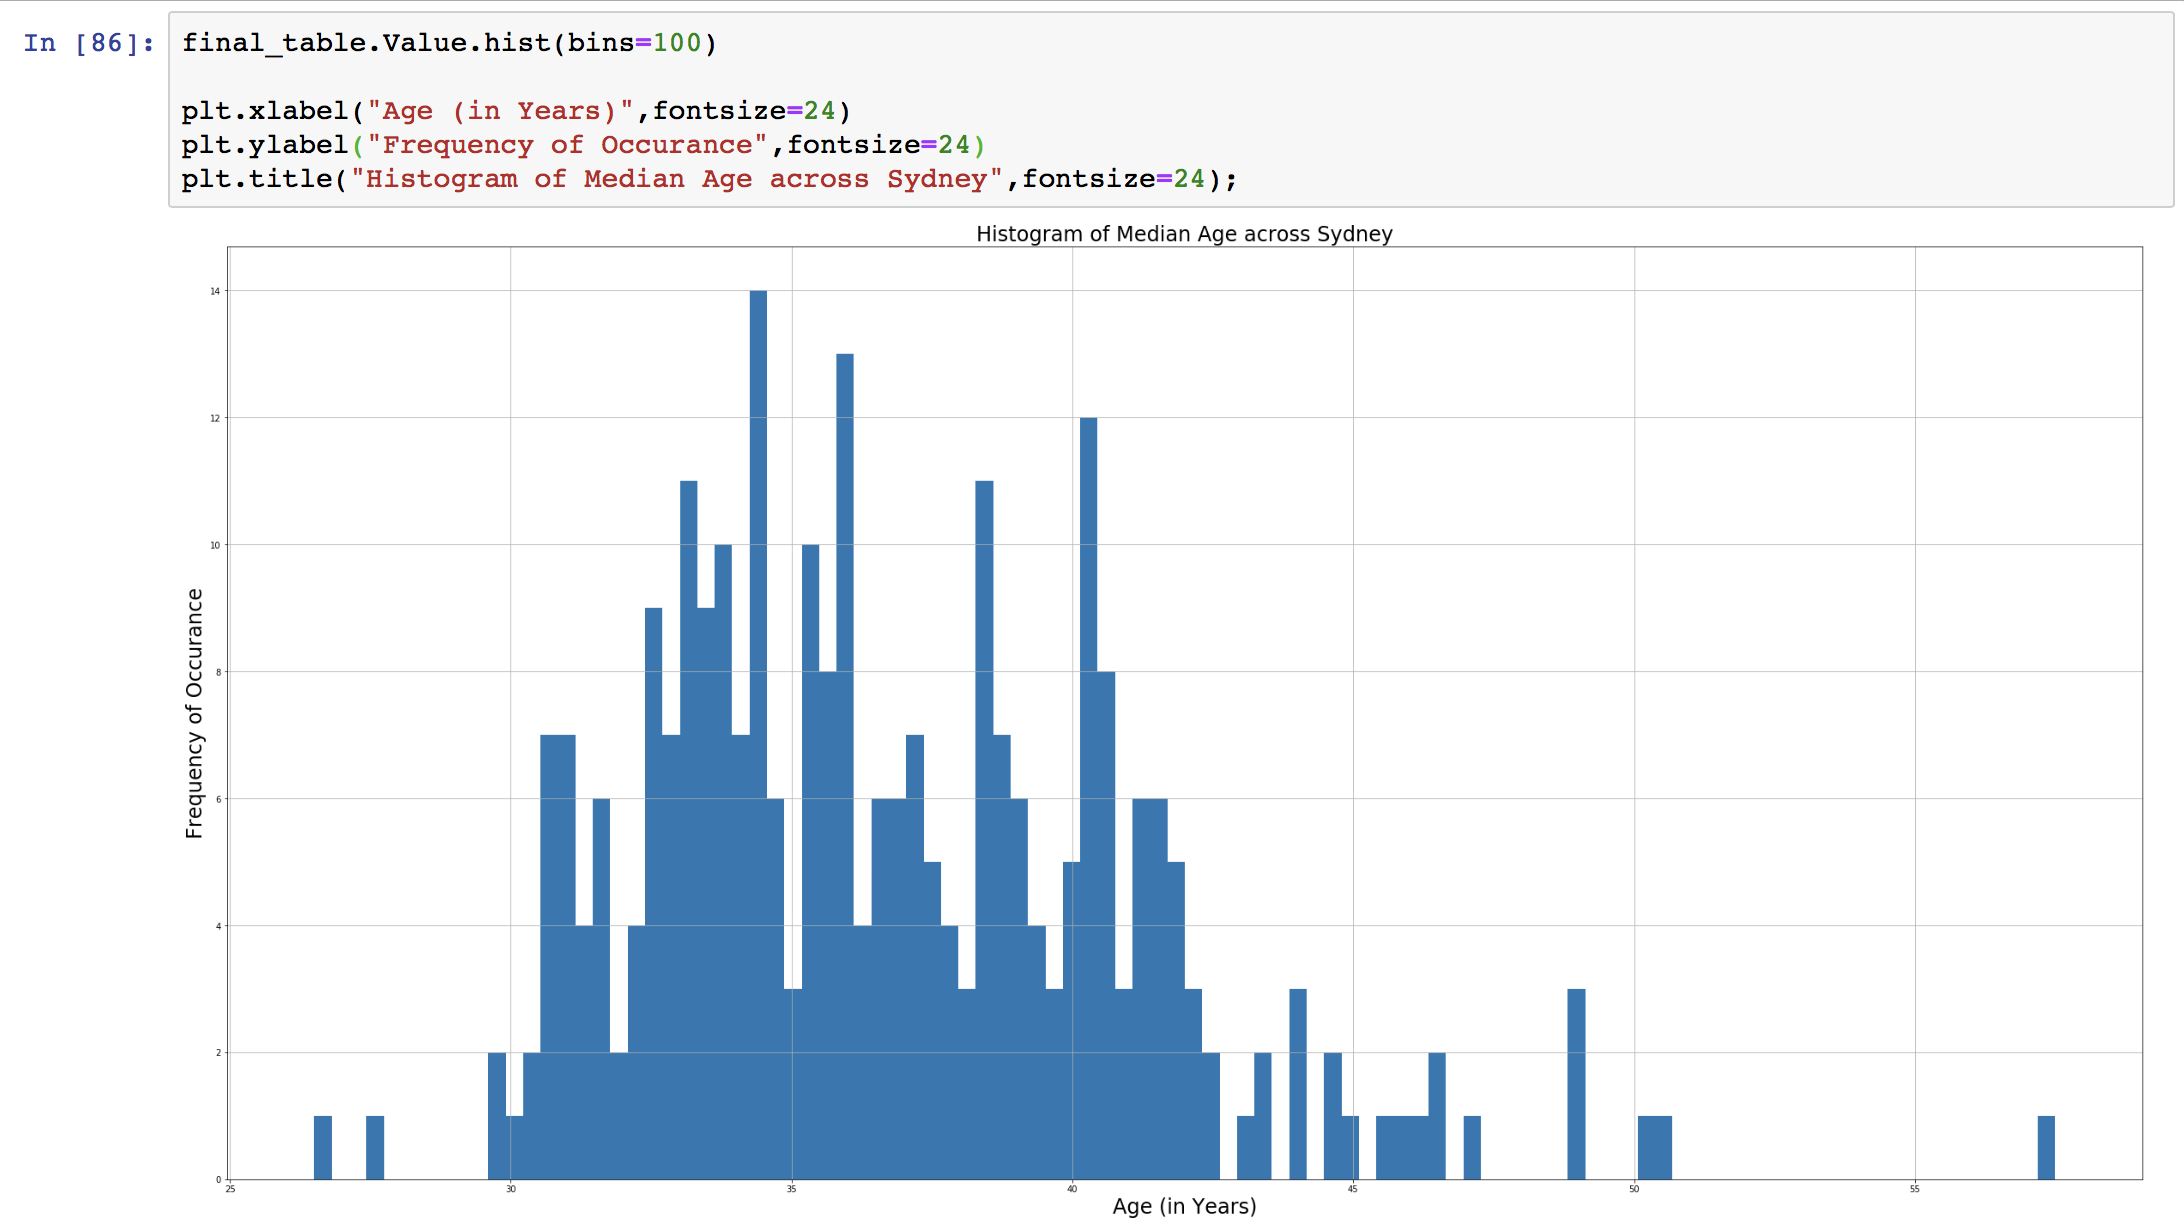

### Map Around Uni 2.0

<img src="30.png" alt="drawing" width="800"/>

**Observation:** The two suburbs adajacent (Kensington and Kingsford) to uni have very low median ages. This is contrasted by Centennial Park which is completely black due to its high median age. However this area should be ignored since its recorded population is only 3 people.

### How does this compare Sydney wide?

<img src="31.png" alt="drawing" width="500"/>

**Observation:** Really interesting data. Clear correlation between higher median ages and waterviews! Could be attributed to higher property price and young people not being able to afford to live in these areas

### Does the story change with Greater Sydney?

<img src="32.png" alt="drawing" width="600"/>

**Observation:** Also, a clear trend for older people to live away from the city bar a few notable exceptions. Interestlingly with the introduction of these outer areas, the correlation between higher median ages and waterviews is much less pronounced. Shows how data can be manipulated to tell a different story.

## Cool Bar Graphs
For our top and bottom 10 areas

<img src="34.png" alt="drawing" width="1100"/>

**Observation**: Unexpectly Castle Hill and Wetherill Park have popped up in top 10 oldest areas! Easily missed that when looking at the maps due their smaller size

<img src="33.png" alt="drawing" width="1400"/>

**Observation:** Worringly Auburn has popped up on our youngest suburb list. Does this mean that thier homeless are consistant mostly of youth? Similar to UNSW, areas around Sydney University also appear which intuitively makes sense as most people who go to university are young and they want/need to live close to campus

### Local map Around Sydney Uni

<img src="35.png" alt="drawing" width="600"/>

**Observation:** Beginning to understand limitation of this software. The map around UNSW appears to be a lighter grey but only because the data is skewed by the outlier of Centinnal Park 

### New map of UNSW
Minus Centennial Park

<img src="36.png" alt="drawing" width="600"/>

**Observation:** Looks completely different. Areas near the ocean on East side show higher median ages which is most likely more accurate reflection due to higher property prices if we continue with our previous assumption.

### Old map of UNSW
With Centennial Park *for comparison*

<img src="30.png" alt="drawing" width="800"/>

### Map Inclusive of both UNSW and USyd

<img src="37.png" alt="drawing" width="600"/>

**Observation:** Can only tell which effect is greater with a map that direct compares them. Conclusion is that UNSW has a higher proportion of student living around campus as there are many non-university students who live around USyd in suburbs such as Newtown

### Is median age the best measure to find the old people?
Probably not by itself as shown by this article by US census (https://www.census.gov/library/stories/2019/06/median-age-does-not-tell-the-whole-story.html).

However, it exceeded my expectations on this exploration and presented us data that is very plausible. Some further articles that explore this topic include (https://blog.id.com.au/2017/population/demographic-trends/where-do-older-people-live/) and (https://www.smh.com.au/national/nsw/sydneys-youngest-and-oldest-suburbs-20160905-gr8sap.html)

**Beware** unless you examine the census yourself who knows if they are actually right!

## Overseas arrivals, where do they settle?
Insight into our immigrant population for 2018

### How many international arrivals do we get?

According to 2018 data and pandaframe.sum( ), we had 164,894 international arrivals

<img src="9.png" alt="drawing" width="1400"/>

With a median of 5692 people per SA2 area, we had on average 357 visitors which equates to around 6.27% of the total population

### Do we have any international arrivals around UNSW?

Surely we do, **1/3** of student population are international! Well at least according to:

<img src="11.png" alt="drawing" width="600"/>

https://www.unsw.edu.au/sites/default/files/documents/AnnualReport_Volume1_2017_150dpi.pdf

<img src="2.png" alt="drawing" width="800"/>

**Observation:** Interestingly, Waterloo-Beaconsfield had the most international arrivals. This does not correlate with the two areas with lowest median age in Kingsford and Kensington where we assume most UNSW students live. Therefore, is the effect not as great as we imagine or do domestic student live apart from international students?

### Let's look across Metropolitan Sydney...

<img src="4.png" alt="drawing" width="800"/>

**What two suburbs are darkest green?**

*Parramatta and the Rocks!* The suburbs around UNSW still are still comparatively high though

### Do our international arrivals settle in rural and semi-rural areas?

<img src="1.png" alt="drawing" width="800"/>

**Observation:** Not really, our outer suburbs are barely visible! International arrivals like to stay urban areas with Parramatta seen as an alternative to the city. 

### Our Top 10 Areas with Highest International Arrivals!

<img src="5.png" alt="drawing" width="800"/>

### Our Top 10 Areas with Lowest International Arrivals!

 **Note:** A whole bunch of areas recorded zero arrivals. Some may be true, most are probably wrong. These were ignored!
 
 <img src="6.png" alt="drawing" width="800"/>

 Some code for reference on how to alter different aspects of the graph. **Note:** change of scale
 
 <img src="7.png" alt="drawing" width="1000"/>
 
 **Observation:** A lot of these places are rural areas which I don't know much about!

If we limit the area to more Inner Sydney with Ben's distance to UNSW function where most of the International arrivals settle, we get....

 <img src="10.png" alt="drawing" width="1000"/>
 
 **Observation:** This is more interesting (at least for me). Fascinated that Putney scored so low. It's a nice waterside suburb not too far from the city! Guess it doesn't have an international reputation. 